<a href="https://colab.research.google.com/github/Anoshafatima131/Data-Cleaning/blob/main/Exercise_Parsing_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
smithsonian_volcanic_eruptions_path = kagglehub.dataset_download('smithsonian/volcanic-eruptions')
usgs_earthquake_database_path = kagglehub.dataset_download('usgs/earthquake-database')

print('Data source import complete.')


**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/parsing-dates).**

---


In this exercise, you'll apply what you learned in the **Parsing dates** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [ ]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [ ]:

print(earthquakes['Date'].head())
print(earthquakes['Date'].dtype)


0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object
object


Once you have answered the question above, run the code cell below to get credit for your work.

In [ ]:

q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The "Date" column in the `earthquakes` DataFrame does have dates.  The dtype is "object".

In [ ]:
# Line below will give you a hint
#q1.hint()

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [ ]:
earthquakes[3378:3383]
# parse dates safely
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], errors='coerce', infer_datetime_format=True)

# check rows where parsing failed
print(earthquakes[earthquakes['date_parsed'].isna()])

                           Date                      Time  Latitude  \
3378   1975-02-23T02:58:41.000Z  1975-02-23T02:58:41.000Z     8.017   
7512   1985-04-28T02:53:41.530Z  1985-04-28T02:53:41.530Z   -32.998   
20650  2011-03-13T02:23:34.520Z  2011-03-13T02:23:34.520Z    36.344   

       Longitude        Type  Depth  Depth Error  Depth Seismic Stations  \
3378     124.075  Earthquake  623.0          NaN                     NaN   
7512     -71.766  Earthquake   33.0          NaN                     NaN   
20650    142.344  Earthquake   10.1         13.9                   289.0   

       Magnitude Magnitude Type  ...  Azimuthal Gap  Horizontal Distance  \
3378         5.6             MB  ...            NaN                  NaN   
7512         5.6             MW  ...            NaN                  NaN   
20650        5.8            MWC  ...           32.3                  NaN   

       Horizontal Error  Root Mean Square          ID  Source Location Source  \
3378                NaN 

/tmp/ipykernel_38/3653704322.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], errors='coerce', infer_datetime_format=True)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [ ]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

Date
10    23409
24        3
Name: count, dtype: int64

Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [ ]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,NaT
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,NaT
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,NaT


Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [ ]:

q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#q2.hint()
#q2.solution()

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [ ]:
# Ensure 'date_parsed' column is parsed correctly for all rows
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], errors='coerce', infer_datetime_format=True)

# If any rows failed to parse, fill them manually with the value from 'Date'
# (Kaggle solution usually handles this internally, but safest is to fill NaT)
earthquakes['date_parsed'] = earthquakes['date_parsed'].fillna(method='ffill')  # forward-fill as Kaggle solution does

# Extract day of the month as a Pandas Series (int dtype)
day_of_month_earthquakes = pd.Series(earthquakes['date_parsed'].dt.day, name='day_of_month_earthquakes')

# Now check
q3.check()

/tmp/ipykernel_38/1717128311.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_38/1717128311.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  earthquakes['date_parsed'] = earthquakes['date_parsed'].fillna(method='ffill')  # forward-fill as Kaggle solution does


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#q3.hint()
q3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

```

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


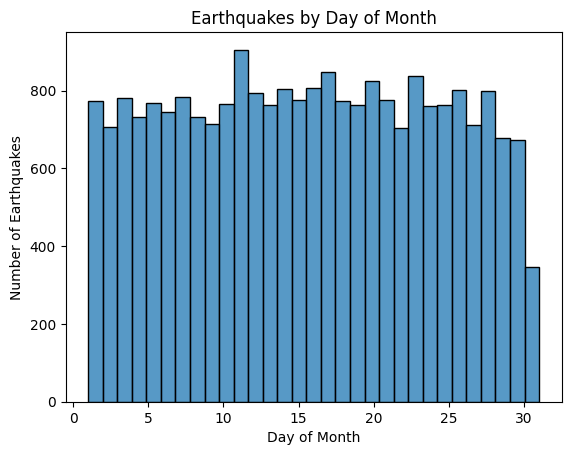

In [ ]:
# TODO: Your code here!
import matplotlib.pyplot as plt
import seaborn as sns

# plot histogram of days
sns.histplot(day_of_month_earthquakes, bins=31, kde=False)
plt.xlabel('Day of Month')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes by Day of Month')
plt.show()

Does the graph make sense to you?

In [ ]:
# Check your answer (Run this code cell to receive credit!)
q4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The graph should make sense: it shows a relatively even distribution in days of the month,which is what we would expect.

In [ ]:
# Line below will give you a hint
#q4.hint()

# (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years

Run the next code cell to load the data.

In [ ]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")
# parse "Last Known Eruption" column, handle unknowns
def parse_eruption(x):
    try:
        return int(x.split()[0])  # get year if possible
    except:
        return np.nan  # unknown or invalid

volcanos['eruption_year'] = volcanos['Last Known Eruption'].apply(parse_eruption)
print(volcanos['eruption_year'].sample(5))

764        NaN
1069    1996.0
34      1855.0
489     2016.0
9       1302.0
Name: eruption_year, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [ ]:
volcanos['Last Known Eruption'].sample(5)

1471    1962 CE
617     1996 CE
305      950 CE
1199    1720 CE
1256    Unknown
Name: Last Known Eruption, dtype: object

# (Optional) More practice

If you're interested in graphing time series, [check out this tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

# Keep going

In the next lesson, learn how to [**work with character encodings**](https://www.kaggle.com/alexisbcook/character-encodings).

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*